In [ ]:
import requests # Загрузка новостей с сайта.
from bs4 import BeautifulSoup # Превращалка html в текст.
import re
import pandas as pd

In [ ]:
requests.get("https://www.rzn.info/")

<Response [200]>

In [ ]:
h2s = []
page = 'https://www.rzn.info/'
h2 = BeautifulSoup(requests.get(page).text, "html5lib").find_all("a", class_="stories-item__title-link")
h2s.extend(h2)
print(h2s)

[<a class="stories-item__title-link" href="https://www.rzn.info/news/2022/5/26/v-ryazanskoj-oblasti-prostilis-s-tremya-voennosluzhashimi-pogibshimi-na-ukraine-252127.html" target="_blank">
                                                            В Рязанской области простились с тремя военнослужащими, погибшими на У...
                                                                                                                    </a>, <a class="stories-item__title-link" href="https://www.rzn.info/news/2022/5/26/v-aleksandro-nevskom-v-dtp-popal-15-letnij-motociklist-252108.html" target="_blank">
                                                            В Александро-Невском в ДТП попал 15-летний мотоциклист
                                                                                                                    </a>, <a class="stories-item__title-link" href="https://www.rzn.info/news/2022/5/26/centralnyj-bank-rossii-snizil-klyuchevuyu-stavku-do-11-252082.html" target="_

In [ ]:
links=[l["href"] for l in h2s]
links = list(dict.fromkeys(links))
print(links)

['https://www.rzn.info/news/2022/5/26/v-ryazanskoj-oblasti-prostilis-s-tremya-voennosluzhashimi-pogibshimi-na-ukraine-252127.html', 'https://www.rzn.info/news/2022/5/26/v-aleksandro-nevskom-v-dtp-popal-15-letnij-motociklist-252108.html', 'https://www.rzn.info/news/2022/5/26/centralnyj-bank-rossii-snizil-klyuchevuyu-stavku-do-11-252082.html', 'https://www.rzn.info/news/2022/5/27/v-ryazani-velosipedist-vrezalsya-v-mashinu-252142.html', 'https://www.rzn.info/news/2022/5/27/stali-izvestny-varianty-novogo-nazvaniya-mcdonald-s-v-rossii-252141.html', 'https://www.rzn.info/news/2022/5/26/v-lesoparke-obnaruzhili-pogibshego-losenka-252132.html', 'https://www.rzn.info/news/2022/5/26/a-chto-v-kino-moj-papa-vozhd-tochka-kipeniya-i-drugie-novinki-252129.html', 'https://www.rzn.info/news/2022/5/27/tureckie-brendy-odezhdy-i-tovarov-dlya-doma-planiruyut-vyjti-na-rossijskij-rynok-252143.html', 'https://www.rzn.info/news/2022/5/27/propavshego-v-ryazhske-muzhchinu-nashli-zhivym-252140.html', 'https://www.

In [ ]:
texts = []
titles = []
for link in links:
  resp2=requests.get(link)
  BeautifulSoup(resp2.text, "html5lib").get_text()
  bs=BeautifulSoup(resp2.text, "html5lib") 
  title=bs.p.text  
  text=" ".join([p.text for p in bs.find_all("p")])
  texts.append(text)
  titles.append(title)

In [ ]:
i=0
while i < len(texts): 
  texts[i] = texts[i].replace('\xa0', ' ') 
  i=i+1

In [ ]:
print(texts)

['В Рязанской области простились с тремя военнослужащими, погибшими на Украине.  Церемонии проходили в четверг, 26 мая.  В Рязани и Рязанском районе простились с гвардии старшим сержантом Кириллом Беловым, гвардии старшим прапорщиком Дмитрием Кривошеевым и гвардии майором Александром Денисовым. Они погибли во время спецоперации на территории Украины.  На траурных мероприятиях соблюдали все воинские почести. В церемониях участвовали представители облправительства, администраций Рязани и Рязанского района, епархии, Рязанского военного гарнизона, командования ВДВ, общественных организаций, ветераны, а также родные и близкие солдат.  Соболезнования выразил врио губернатора Павел Малков. © 2004–2022. Все права защищены.Рязанский городской сайт RZN.info Реестровая запись СМИ Эл № ФС77-41916, выдано Роскомнадзором 10.09.2010 г +7 (4912) 470-700, +7 (903) 839-19-94 Разработка и поддержка — AMdesign.ru Обнаружив неточность в тексте на данной странице, выделите ее и нажмите Ctrl+Enter', 'В Алекс

In [ ]:
from pandas import DataFrame
d = {'Titles': titles, 'News': texts}
nws = pd.DataFrame(data=d)
nws

,Titles,News
0,В Рязанской области простились с тремя военнос...,В Рязанской области простились с тремя военнос...
1,В Александро-Невском в ДТП попал 15-летний мот...,В Александро-Невском в ДТП попал 15-летний мот...
2,Центральный банк России снизил ключевую ставку...,Центральный банк России снизил ключевую ставку...
3,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...
4,McDonald’s выбирает новое название для рестора...,McDonald’s выбирает новое название для рестора...
5,В Лесопарке обнаружили погибшего лосенка. Об э...,В Лесопарке обнаружили погибшего лосенка. Об э...
6,Четверг — традиционный день киноновинок. Афиша...,Четверг — традиционный день киноновинок. Афиша...
7,Турецкие бренды одежды и товаров для дома план...,Турецкие бренды одежды и товаров для дома план...
8,"Андрея Чичкова, пропавшего в Ряжске, нашли жив...","Андрея Чичкова, пропавшего в Ряжске, нашли жив..."
9,Рязанцев предупредили о сильном ветре. Сообщен...,Рязанцев предупредили о сильном ветре. Сообщен...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [ ]:
!pip install pymorphy2
import pymorphy2
morph=pymorphy2.MorphAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 10.3 MB/s 


In [ ]:
def getMostFrequentWords(text):
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, res[0,i]) for i in range(res[0].shape[1])], 
                 key = lambda x: x[1], reverse = True)[:5]
    vocabular = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] 
            for i, f in frq], vocabular

In [ ]:
imp_POS = ['ADJF', 'ADJS', 'NOUN', 'VERB', 'PRTF', 'PRTS', 'GRND']

def getMostFrequentWordsFiltered(text):
    
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        if pv[0].tag.POS in imp_POS and pv[0].normal_form != 'быть':
            words.append(pv[0].normal_form)
    text = ' '.join(words)
    
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab

In [ ]:
freqwords = []
vocabular = []
for i in tqdm(range(nws.shape[0])):
    fw, v = getMostFrequentWordsFiltered(nws.News.iloc[i])
    freqwords.append(fw)
    vocabular.append(v)
    
nws['Vocabular'] = vocabular
nws['Freq Words'] = freqwords

100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


In [ ]:
nws.head()

,Titles,News,Vocabular,Freq Words
0,В Рязанской области простились с тремя военнос...,В Рязанской области простились с тремя военнос...,"{'рязанский': 5, 'область': 1, 'проститься': 2...","[рязанский, гвардия, гвардия старший, простить..."
1,В Александро-Невском в ДТП попал 15-летний мот...,В Александро-Невском в ДТП попал 15-летний мот...,"{'александро-невский': 2, 'дтп': 1, 'попасть':...","[мотоцикл, александро-невский, водитель, мотоц..."
2,Центральный банк России снизил ключевую ставку...,Центральный банк России снизил ключевую ставку...,"{'центральный': 1, 'банк': 1, 'россия': 1, 'сн...","[ключевой, ключевой ставка, сайт, ставка, апрель]"
3,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,"{'рязань': 1, 'чайка': 1, 'дтп': 1, 'попасть':...","[велосипедист, попасть, авария, авария попасть..."
4,McDonald’s выбирает новое название для рестора...,McDonald’s выбирает новое название для рестора...,"{'выбирать': 1, 'новый': 2, 'название': 2, 'ре...","[заявка, бренд, известный, источник, название]"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
def normalizePymorphy2(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form)
    return words

In [ ]:
tfCounter=TfidfVectorizer(lowercase=True, analyzer='word', min_df=2, max_features =5000, stop_words = ['мы', 'ее', 'между', 'собой', 'но', 'снова', 'там', 'о', 'однажды', 'во время', 'вне', 'очень', ' иметь ',' с ',' они ',' свой ', 'самой', 'или', ' ему ',' каждому ',' тому ', 'самим', 'до', 'ниже', 'мы', 'мы', 'эти', 'ваши', 'его', 'до' , 'не' , 'ни', 'я', 'были', 'ее', 'больше', 'он сам', 'это', 'вниз', 'должен', 'наш', 'их', 'пока',  'выше',' оба ',' вверх ',' до ',' наш ',' имел ',' она ',' все ',' нет ',' когда ',' в ',' любое ',' до ' , 'им', 'то же самое', 'и', 'был', 'имейте', 'в', 'будет', 'на', 'делает', 'вы', 'тогда', 'тот', ' потому что что', 'над', 'почему', 'так', 'может', 'сделал', 'не', 'сейчас', 'под', 'он', 'ты', 'сама' , 'имеет', 'просто', 'где', 'тоже', 'только', 'я', 'который', 'те', 'я', 'после', 'несколько', 'кого',' бытие ',' если ',' их ',' мое ',' против ',' a ',' by ',' делать ',' это ',' как ',' дальше ',' было ', 'здесь'])
tfres=tfCounter.fit_transform([' '.join(normalizePymorphy2(n)) for n in nws.News] )

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['an', 'be', 'by', 'do', 'for', 'into', 'its', 'some', 'such', 'yours', 'больше', 'были', 'было', 'бытие', 'ваши', 'вверх', 'вниз', 'во', 'время', 'все', 'выше', 'где', 'дальше', 'делать', 'до', 'должен', 'его', 'ему', 'если', 'же', 'имеет', 'имел', 'иметь', 'их', 'каждому', 'как', 'когда', 'кого', 'который', 'любое', 'мое', 'может', 'над', 'наш', 'не', 'несколько', 'нет', 'ни', 'ниже', 'оба', 'он', 'она', 'они', 'под', 'пока', 'после', 'потому', 'почему', 'просто', 'против', 'сам', 'сама', 'самим', 'самое', 'свой', 'сделал', 'сейчас', 'так', 'те', 'то', 'тоже', 'только', 'тому', 'ты', 'что', 'эти', 'это'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
freqwords = []
for i in tqdm(range(nws.shape[0])):

    tfs = [(k,tfres[i][0, tfCounter.vocabulary_.get(k)]) for k in nws.Vocabular.iloc[i] 
         if k in tfCounter.vocabulary_.keys()]
    fw = [w for w, f in sorted(tfs, key = lambda x: x[1], reverse = True)[:5]]
    freqwords.append(fw)
    
nws['Freq Words TFIDF'] = freqwords

100%|██████████| 26/26 [00:00<00:00, 177.93it/s]


In [ ]:
nws.head()

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF
0,В Рязанской области простились с тремя военнос...,В Рязанской области простились с тремя военнос...,"{'рязанский': 5, 'область': 1, 'проститься': 2...","[рязанский, гвардия, гвардия старший, простить...","[украина, рязань, рязанский, район, погибший]"
1,В Александро-Невском в ДТП попал 15-летний мот...,В Александро-Невском в ДТП попал 15-летний мот...,"{'александро-невский': 2, 'дтп': 1, 'попасть':...","[мотоцикл, александро-невский, водитель, мотоц...","[водитель, отмечаться, попасть, улица, врезаться]"
2,Центральный банк России снизил ключевую ставку...,Центральный банк России снизил ключевую ставку...,"{'центральный': 1, 'банк': 1, 'россия': 1, 'сн...","[ключевой, ключевой ставка, сайт, ставка, апрель]","[ключевой, информация, появиться, вступить, сила]"
3,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,"{'рязань': 1, 'чайка': 1, 'дтп': 1, 'попасть':...","[велосипедист, попасть, авария, авария попасть...","[попасть, вконтакте, врезаться, дтп, авария]"
4,McDonald’s выбирает новое название для рестора...,McDonald’s выбирает новое название для рестора...,"{'выбирать': 1, 'новый': 2, 'название': 2, 'ре...","[заявка, бренд, известный, источник, название]","[подать, бренд, новый, россия, ресторан]"


In [ ]:
freqwords_array = []
for i in tqdm(range(nws.shape[0])):
    tfs = tfres.toarray()[i]
    freqwords_array.append(tfs)

nws['Freq Words TFIDF Array'] = freqwords_array

100%|██████████| 26/26 [00:00<00:00, 22924.51it/s]


In [ ]:
nws.head()

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF,Freq Words TFIDF Array
0,В Рязанской области простились с тремя военнос...,В Рязанской области простились с тремя военнос...,"{'рязанский': 5, 'область': 1, 'проститься': 2...","[рязанский, гвардия, гвардия старший, простить...","[украина, рязань, рязанский, район, погибший]","[0.05469956969698088, 0.05469956969698088, 0.0..."
1,В Александро-Невском в ДТП попал 15-летний мот...,В Александро-Невском в ДТП попал 15-летний мот...,"{'александро-невский': 2, 'дтп': 1, 'попасть':...","[мотоцикл, александро-невский, водитель, мотоц...","[водитель, отмечаться, попасть, улица, врезаться]","[0.05137310046150602, 0.05137310046150602, 0.0..."
2,Центральный банк России снизил ключевую ставку...,Центральный банк России снизил ключевую ставку...,"{'центральный': 1, 'банк': 1, 'россия': 1, 'сн...","[ключевой, ключевой ставка, сайт, ставка, апрель]","[ключевой, информация, появиться, вступить, сила]","[0.050519561207273724, 0.050519561207273724, 0..."
3,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,"{'рязань': 1, 'чайка': 1, 'дтп': 1, 'попасть':...","[велосипедист, попасть, авария, авария попасть...","[попасть, вконтакте, врезаться, дтп, авария]","[0.09100259028740436, 0.09100259028740436, 0.0..."
4,McDonald’s выбирает новое название для рестора...,McDonald’s выбирает новое название для рестора...,"{'выбирать': 1, 'новый': 2, 'название': 2, 'ре...","[заявка, бренд, известный, источник, название]","[подать, бренд, новый, россия, ресторан]","[0.05263257070616738, 0.05263257070616738, 0.0..."


In [ ]:
freqwords_array

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df = pd.DataFrame(nws['Freq Words TFIDF Array'].values.tolist(), index=nws['Freq Words TFIDF Array'].index)

In [ ]:
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='average')

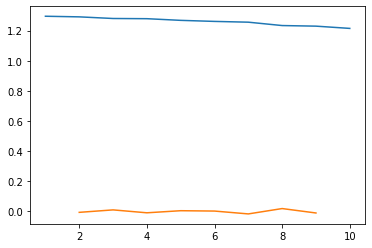

Количество кластеров: 8


In [ ]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Количество кластеров:", k)

In [ ]:
kmeans_rec=KMeans(n_clusters=8)
clusters_rec = kmeans_rec.fit_predict(df)
kmeans_rec=KMeans(n_clusters=14)
clusters_rnd = kmeans_rec.fit_predict(df)

In [ ]:
from scipy.special import comb
def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
print(rand_index_score (clusters_rec, clusters_rnd))

0.9323076923076923


In [ ]:
clusters_rec +1

array([7, 3, 6, 3, 1, 7, 1, 1, 7, 6, 7, 4, 7, 4, 2, 3, 4, 5, 2, 2, 8, 8,
       5, 2, 6, 8], dtype=int32)

In [ ]:
nws['KMeans Cluster'] = clusters_rec +1

In [ ]:
nws[clusters_rec == 1]

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF,Freq Words TFIDF Array,KMeans Cluster
14,Суд признал законным увольнение росгвардейцев ...,Суд признал законным увольнение росгвардейцев ...,"{'суд': 5, 'признать': 1, 'законный': 2, 'увол...","[суд, военный, бывший, законный, иск]","[суд, служба, военный, спецоперация, бывший]","[0.03437150041095961, 0.03437150041095961, 0.0...",2
18,Жителя Михайловского района осудят за незаконн...,Жителя Михайловского района осудят за незаконн...,"{'житель': 2, 'михайловский': 2, 'район': 1, '...","[мужчина, оружие, патрон, сбыт, боеприпас]","[оружие, мужчина, житель, знакомый, товар]","[0.04538192131014137, 0.04538192131014137, 0.0...",2
19,На «Азовстали» задержали спрятавшихся украинск...,На «Азовстали» задержали спрятавшихся украинск...,"{'азовсталь': 2, 'задержать': 2, 'спрятаться':...","[территория, азовсталь, глава, задержать, мочь]","[территория, задержать, мочь, глава, республика]","[0.043858340882003986, 0.043858340882003986, 0...",2
23,В ООН назвали возможной перспективу ядерного к...,В ООН назвали возможной перспективу ядерного к...,"{'оон': 2, 'назвать': 1, 'возможный': 2, 'перс...","[возможный, конфликт, оон, перспектива, перспе...","[украина, дирекция, вода, сделать, житель]","[0.08313529575432128, 0.08313529575432128, 0.0...",2


In [ ]:
nws[clusters_rec == 3]

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF,Freq Words TFIDF Array,KMeans Cluster
11,В Омской области 15-летний подросток утонул в ...,В Омской области 15-летний подросток утонул в ...,"{'омский': 1, 'область': 1, 'летний': 1, 'подр...","[котлован, подросток, утонуть, азовый, азовый ...","[утонуть, подросток, омский, инцидент, вода]","[0.05270948703429625, 0.05270948703429625, 0.0...",4
13,В Омской области семиклассник утонул в аквапар...,В Омской области семиклассник утонул в аквапар...,"{'омский': 1, 'область': 1, 'семиклассник': 1,...","[аквапарк, утонуть, аквапарк база, аквапарк со...","[утонуть, омский, следкома, инцидент, отдых]","[0.05779908486744024, 0.05779908486744024, 0.0...",4
16,Рязанку оштрафовали за заросший сорняками сель...,Рязанку оштрафовали за заросший сорняками сель...,"{'рязанка': 3, 'оштрафовать': 1, 'зарасти': 1,...","[административный, рязанка, управление, участо...","[управление, проверка, статья, тысяча, часть]","[0.04327088002448726, 0.04327088002448726, 0.0...",4


In [ ]:
nws[clusters_rec == 2]

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF,Freq Words TFIDF Array,KMeans Cluster
1,В Александро-Невском в ДТП попал 15-летний мот...,В Александро-Невском в ДТП попал 15-летний мот...,"{'александро-невский': 2, 'дтп': 1, 'попасть':...","[мотоцикл, александро-невский, водитель, мотоц...","[водитель, отмечаться, попасть, улица, врезаться]","[0.05137310046150602, 0.05137310046150602, 0.0...",3
3,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,В Рязани у ЖК «Чайка» в ДТП попал велосипедист...,"{'рязань': 1, 'чайка': 1, 'дтп': 1, 'попасть':...","[велосипедист, попасть, авария, авария попасть...","[попасть, вконтакте, врезаться, дтп, авария]","[0.09100259028740436, 0.09100259028740436, 0.0...",3
15,В Рязани на улице Спортивной столкнулись два к...,В Рязани на улице Спортивной столкнулись два к...,"{'рязань': 2, 'улица': 2, 'спортивный': 2, 'ст...","[авария, очевидец, рязань, спортивный, столкну...","[авария, улица, рязань, группа, дтп]","[0.06595277618507994, 0.06595277618507994, 0.0...",3


In [ ]:
nws[clusters_rec == 0]

,Titles,News,Vocabular,Freq Words,Freq Words TFIDF,Freq Words TFIDF Array,KMeans Cluster
4,McDonald’s выбирает новое название для рестора...,McDonald’s выбирает новое название для рестора...,"{'выбирать': 1, 'новый': 2, 'название': 2, 'ре...","[заявка, бренд, известный, источник, название]","[подать, бренд, новый, россия, ресторан]","[0.05263257070616738, 0.05263257070616738, 0.0...",1
6,Четверг — традиционный день киноновинок. Афиша...,Четверг — традиционный день киноновинок. Афиша...,"{'четверг': 1, 'традиционный': 1, 'день': 1, '...","[фильм, сайт, главный, кинопоиск, который]","[который, российский, один, этот, мой]","[0.024117232170435283, 0.024117232170435283, 0...",1
7,Турецкие бренды одежды и товаров для дома план...,Турецкие бренды одежды и товаров для дома план...,"{'турецкий': 3, 'бренд': 2, 'одежда': 1, 'това...","[компания, магазин, первый, россия, рынок]","[компания, первый, бренд, открытие, точка]","[0.03480870384005161, 0.03480870384005161, 0.0...",1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
import seaborn as sns

In [ ]:
nws[clusters_rec == 0].shape, nws[clusters_rec == 1].shape, nws[clusters_rec == 2].shape, nws[clusters_rec == 3].shape, nws[clusters_rec == 4].shape, nws[clusters_rec == 5].shape, nws[clusters_rec == 6].shape, nws[clusters_rec == 7].shape

((3, 7), (4, 7), (3, 7), (3, 7), (2, 7), (3, 7), (5, 7), (3, 7))

In [ ]:
df["clusters_rnd"] = clusters_rnd
df["clusters_rec"] = clusters_rec
print(df)

           0         1         2         3         4         5         6  \
0   0.054700  0.054700  0.054700  0.054700  0.054700  0.054700  0.000000   
1   0.051373  0.051373  0.051373  0.051373  0.051373  0.051373  0.000000   
2   0.050520  0.050520  0.050520  0.050520  0.050520  0.050520  0.000000   
3   0.091003  0.091003  0.091003  0.091003  0.091003  0.091003  0.000000   
4   0.052633  0.052633  0.052633  0.052633  0.052633  0.052633  0.000000   
5   0.113693  0.113693  0.113693  0.113693  0.113693  0.113693  0.000000   
6   0.024117  0.024117  0.024117  0.024117  0.024117  0.024117  0.000000   
7   0.034809  0.034809  0.034809  0.034809  0.034809  0.034809  0.000000   
8   0.101065  0.101065  0.101065  0.101065  0.101065  0.101065  0.000000   
9   0.089510  0.089510  0.089510  0.089510  0.089510  0.089510  0.000000   
10  0.061420  0.061420  0.061420  0.061420  0.061420  0.061420  0.392746   
11  0.052709  0.052709  0.052709  0.052709  0.052709  0.052709  0.000000   
12  0.055302

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,0:2528], df['clusters_rec'], random_state=0)

In [ ]:
clf=LinearRegression()
clf=clf.fit(X_train,Y_train)

clf.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9999546125265132

In [ ]:
clf=DecisionTreeClassifier()

clf=clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train,Y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test,Y_test)))
print("f1 accuracy: {:.3f}".format(f1_score(Y_test, Y_pred,  average='weighted')))

Accuracy on training set: 1.000
Accuracy on test set: 0.714
f1 accuracy: 0.619


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


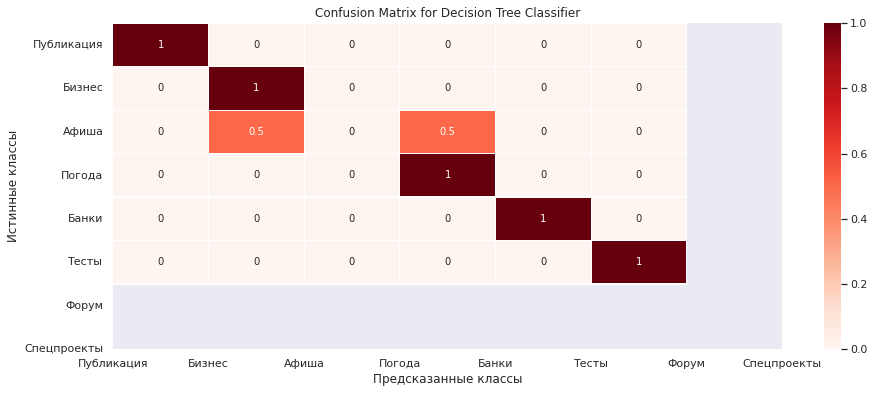

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, clf.predict(X_test))
matrix = confusion_matrix(Y_test, clf.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)
class_names = ['Публикация', 'Бизнес', 'Афиша', 'Погода', 'Банки', 'Тесты', 'Форум', 'Спецпроекты']  
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
clf=RandomForestClassifier(criterion="entropy")

clf=clf.fit(X_train,Y_train)


Y_pred=clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train,Y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test,Y_test)))
print("f1 accuracy: {:.3f}".format(f1_score(Y_test, Y_pred,  average='weighted')))

Accuracy on training set: 1.000
Accuracy on test set: 0.429
f1 accuracy: 0.429


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


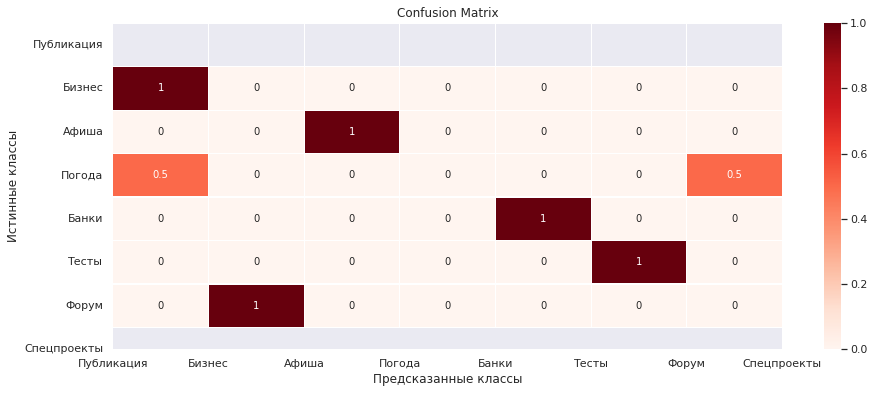

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, clf.predict(X_test))
matrix = confusion_matrix(Y_test, clf.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)
class_names = ['Публикация', 'Бизнес', 'Афиша', 'Погода', 'Банки', 'Тесты', 'Форум', 'Спецпроекты'] 
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix')
plt.show()